In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression, Lasso, Ridge, ElasticNet,
    LassoCV, RidgeCV, ElasticNetCV
)
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [4]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [5]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

## Drop Unncessary Columns

In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
columns_to_drop = ['day', 'month', 'year']
df = df.drop(columns_to_drop, axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## Fixing Categorical Column

In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## Train Test Split

In [11]:
X = df.drop('FWI', axis=1)
y = df['FWI']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

## Feature Selection based on Correlation

In [14]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


### Check for Multicollinearity

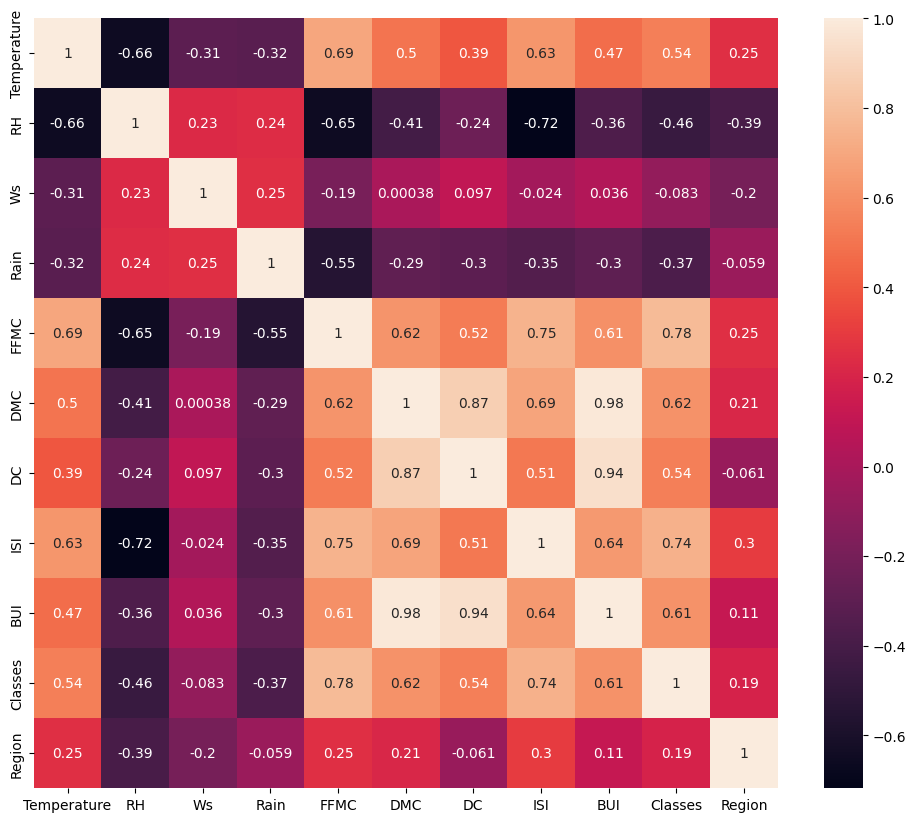

In [15]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [16]:
def correlation(dataset, threshold):
    column_correlation = set()
    correlation_matrix = dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                column_name = correlation_matrix.columns[i]
                column_correlation.add(column_name)
    
    return list(column_correlation)

correlation_features = correlation(X_train, 0.85)
correlation_features

['DC', 'BUI']

### Drop Features based on Correlation

In [17]:
X_train = X_train.drop(correlation_features, axis=1)
X_test = X_test.drop(correlation_features, axis=1)

In [18]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

## Standardization

In [19]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

### Box Plot to Understand the Effect of Standard Scaler

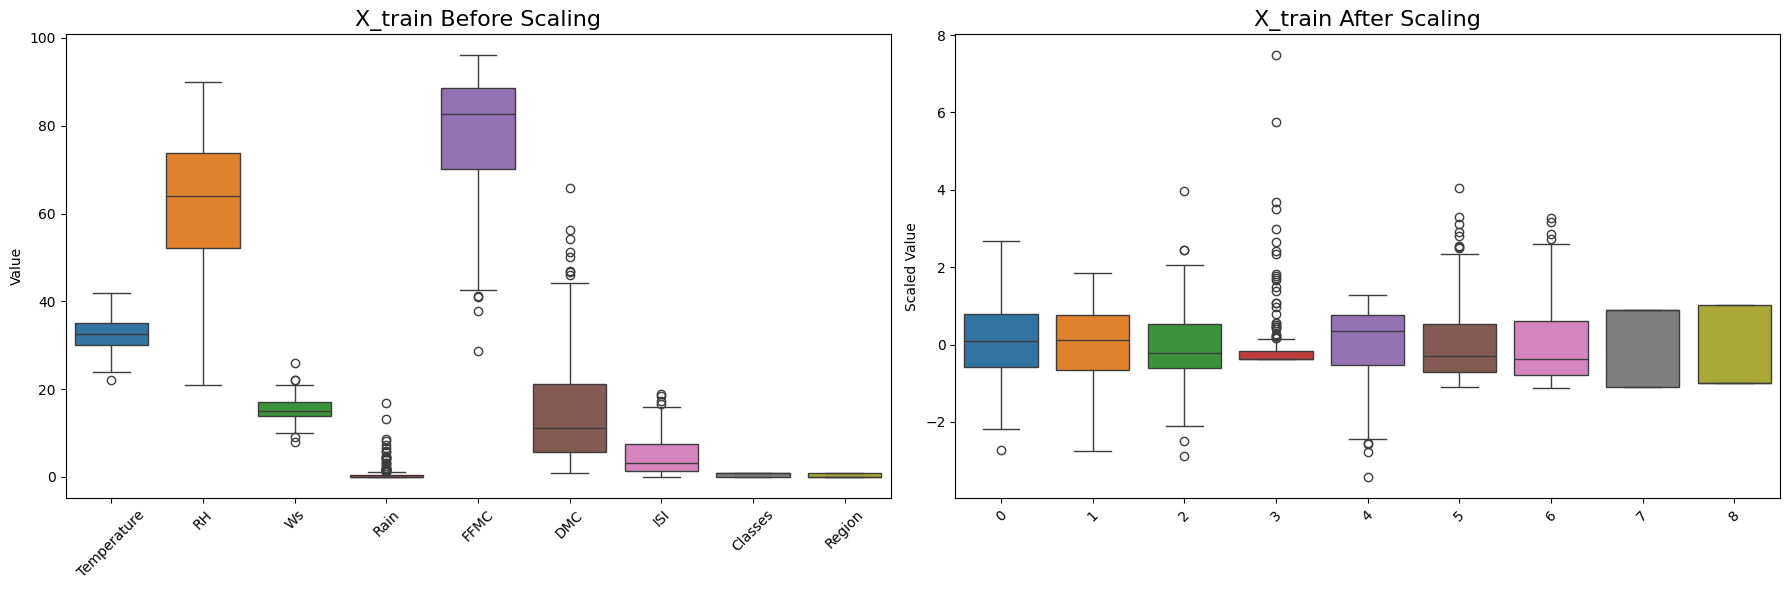

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title('X_train Before Scaling', fontsize=16)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Value')
sns.boxplot(data=X_train_scaled, ax=axes[1])
axes[1].set_title('X_train After Scaling', fontsize=16)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Scaled Value')
plt.tight_layout()
plt.show()

## Model Training

### Linear Regression

In [21]:
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
linear_regression_pred = linear_regression.predict(X_test_scaled)

print(f"Mean Absolute Error: {mean_absolute_error(y_true=y_test, y_pred=linear_regression_pred)}")
print(f"R2 Score: {r2_score(y_true=y_test, y_pred=linear_regression_pred)}")

Mean Absolute Error: 0.5468236465249978
R2 Score: 0.9847657384266951


<Axes: xlabel='FWI'>

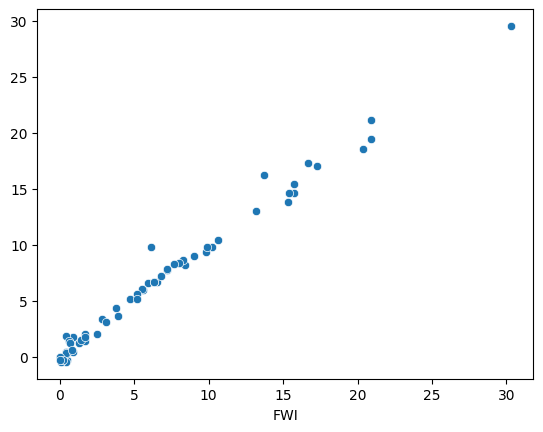

In [22]:
sns.scatterplot(x=y_test, y=linear_regression_pred)

### Lasso Regression

In [23]:
lasso_regression = Lasso()
lasso_regression.fit(X_train_scaled, y_train)
lasso_regression_pred = lasso_regression.predict(X_test_scaled)

print(f"Mean Absolute Error: {mean_absolute_error(y_true=y_test, y_pred=lasso_regression_pred)}")
print(f"R2 Score: {r2_score(y_true=y_test, y_pred=lasso_regression_pred)}")

Mean Absolute Error: 1.133175994914409
R2 Score: 0.9492020263112388


<Axes: xlabel='FWI'>

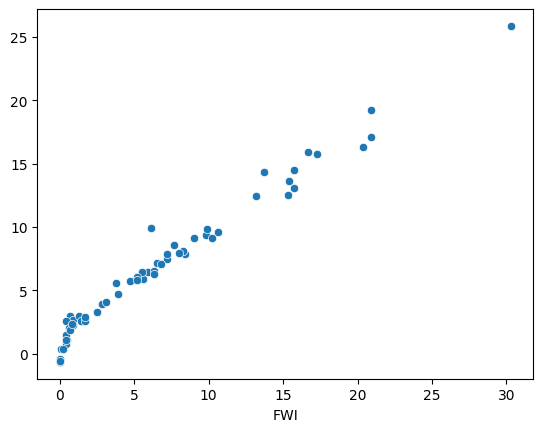

In [24]:
sns.scatterplot(x=y_test, y=lasso_regression_pred)

### Ridge Regression

In [25]:
ridge_regression = Ridge()
ridge_regression.fit(X_train_scaled, y_train)
ridge_regression_pred = ridge_regression.predict(X_test_scaled)

print(f"Mean Absolute Error: {mean_absolute_error(y_true=y_test, y_pred=ridge_regression_pred)}")
print(f"R2 Score: {r2_score(y_true=y_test, y_pred=ridge_regression_pred)}")

Mean Absolute Error: 0.5642305340105715
R2 Score: 0.9842993364555512


<Axes: xlabel='FWI'>

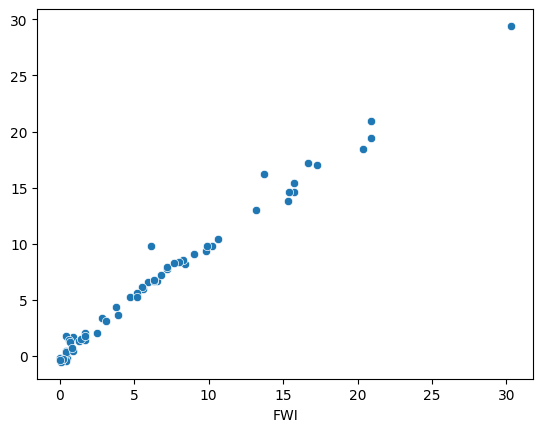

In [26]:
sns.scatterplot(x=y_test, y=ridge_regression_pred)

### ElasticNet

In [27]:
elastic_net_regression = ElasticNet()
elastic_net_regression.fit(X_train_scaled, y_train)
elastic_net_regression_pred = elastic_net_regression.predict(X_test_scaled)

print(f"Mean Absolute Error: {mean_absolute_error(y_true=y_test, y_pred=elastic_net_regression_pred)}")
print(f"R2 Score: {r2_score(y_true=y_test, y_pred=elastic_net_regression_pred)}")

Mean Absolute Error: 1.8822353634896005
R2 Score: 0.8753460589519703


<Axes: xlabel='FWI'>

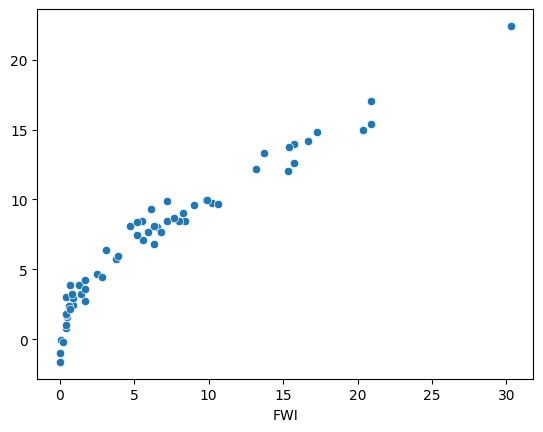

In [28]:
sns.scatterplot(x=y_test, y=elastic_net_regression_pred)

## Hyperparameter Tuning

### Lasso CV

In [29]:
lasso_cv_regression = LassoCV(cv=5)
lasso_cv_regression.fit(X_train_scaled, y_train)
lasso_cv_regression_pred = lasso_cv_regression.predict(X_test_scaled)

print(f"Mean Absolute Error: {mean_absolute_error(y_true=y_test, y_pred=lasso_cv_regression_pred)}")
print(f"R2 Score: {r2_score(y_true=y_test, y_pred=lasso_cv_regression_pred)}")

Mean Absolute Error: 0.619970115826343
R2 Score: 0.9820946715928275


In [30]:
lasso_cv_regression.alpha_

np.float64(0.05725391318234408)

In [31]:
lasso_cv_regression.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [33]:
# lasso_cv_regression.mse_path_

### Ridge CV

In [34]:
ridge_cv_regression = RidgeCV(cv=5)
ridge_cv_regression.fit(X_train_scaled, y_train)
ridge_cv_regression_pred = ridge_cv_regression.predict(X_test_scaled)

print(f"Mean Absolute Error: {mean_absolute_error(y_true=y_test, y_pred=ridge_cv_regression_pred)}")
print(f"R2 Score: {r2_score(y_true=y_test, y_pred=ridge_cv_regression_pred)}")

Mean Absolute Error: 0.5642305340105715
R2 Score: 0.9842993364555512


In [35]:
ridge_cv_regression.alpha_

np.float64(1.0)

In [36]:
ridge_cv_regression.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

### Elastic Net CV

In [37]:
elastic_net_cv_regression = ElasticNetCV(cv=5)
elastic_net_cv_regression.fit(X_train_scaled, y_train)
elastic_net_cv_regression_pred = elastic_net_cv_regression.predict(X_test_scaled)

print(f"Mean Absolute Error: {mean_absolute_error(y_true=y_test, y_pred=elastic_net_cv_regression_pred)}")
print(f"R2 Score: {r2_score(y_true=y_test, y_pred=elastic_net_cv_regression_pred)}")

Mean Absolute Error: 0.6575946731430898
R2 Score: 0.9814217587854941


In [38]:
elastic_net_cv_regression.alpha_

np.float64(0.04311146156383891)

In [39]:
elastic_net_cv_regression.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

## Model Pickling

Pickle Machine Learning Model and Preprocessing Model

In [40]:
import pickle

In [41]:
scalar

StandardScaler()

In [42]:
ridge_regression

Ridge()

In [43]:
pickle.dump(scalar, open(file='scalar.pkl', mode='wb'))
pickle.dump(ridge_regression, open(file='ridge.pkl', mode='wb'))